<a href="https://colab.research.google.com/github/hannahsophieMWB/machine_learning_MiT/blob/main/capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loan Default Prediction**

## **Problem Definition**

### **The Context:**

Accurate prediction of loan default risk is crucial for regulators and lenders to pinpoint high-risk borrowers and implement preemptive strategies that contribute to the financial system's stability. While traditional forecasting models have primarily focused on enhancing the accuracy of predicting loan defaults, they often overlook the importance of optimizing for profitability whilst ensuring fairness [1].

With the advent of AI and ML technologies, there's an opportunity to address these shortcomings. These technologies promise greater precision in identifying loan default risks, but they also introduce challenges related to transparency and fairness [2].

This notebook explores the use of the Home Equity dataset (HMEQ) to develop a credit scoring model that is both profitable and fair, offering clear justifications for its assessments.

### **The objective:**

Develop a predictive model that not only forecasts loan defaults with enhanced accuracy and profitability focus but also adheres to fairness guidelines. This entails optimizing key performance metrics (precision, recall, F1 Score, and AUC-ROC) to ensure robust financial risk management, regulatory compliance, and ethical lending practices.

The primary goal is to develop a machine learning model capable of predicting the likelihood of loan defaults with high accuracy maximising for profitability. Given the complexities of loan default prediction, including regulatory compliance, ethical lending practices, and financial risk management, prioritizing a mix of precision, recall, and the F1 Score is advisable. Additionally, considering AUC-ROC for its ability to evaluate the model's performance across various thresholds can provide a more nuanced understanding of its predictive capabilities.

Therefore, the objective is twofold: First, to enable the bank to make informed, data-driven decisions that minimize the risk of defaults, and second, to ensure that these decisions are transparent and justifiable. By doing so, the bank can safeguard its financial interests while upholding principles of fairness and equality in its lending practices.
### **The key questions:**

1. Defaulter Characteristics: What traits distinguish likely defaulters in the HMEQ dataset?
2. Model Performance: How can we refine our model to optimize for both profitability and accuracy, particularly focusing on improving the F1 score and AUC-ROC?
3. Model Transparency: How does the model justify its predictions, especially in denial cases, to ensure decisions are well-founded?
4. Fairness and Bias: How does the model maintain fairness and prevent bias against specific applicant groups?
5. Financial Impact and Mitigation: What financial effects do loan defaults have, and how can the model mitigate these losses?
6. Policy Recommendations: Based on the model’s insights, what loan approval process improvements can be proposed to minimize defaults while promoting fairness?

### **The problem formulation**:

This study aims to develop and validate a machine learning model that predicts loan default risk with high precision, optimizing for profitability while ensuring compliance with fairness and bias prevention standards. It addresses the critical challenge of integrating advanced predictive analytics with ethical lending practices, amid evidence of existing biases in loan evaluation processes that can disproportionately affect women and other marginalized groups. Through rigorous evaluation of model performance metrics and fairness indicators, the research seeks to establish a balanced approach to risk assessment that supports financial stability and promotes equitable lending decisions.


## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.

* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property.

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts)

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments).

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due).

* **CLAGE:** Age of the oldest credit line in months.

* **NINQ:** Number of recent credit inquiries.

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.


**bold text**
## **Import the necessary libraries and Data**

In [ ]:

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Decision Tree
from sklearn.tree import DecisionTreeClassifier




# Ensure plots are displayed inline in the notebook
%matplotlib inline


In [ ]:
!pip install nbconvert

In [ ]:
# mount GDrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read the healthcare dataset file
data = pd.read_csv("/content/drive/MyDrive/AI and Machine Learning/machine_learning_MiT/MiT Course/Capstone Project/Capstone Project Data.csv")

**bold text**## **Data Overview**

In [ ]:
data.head(10)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
6,1,1800,48649.0,57037.0,HomeImp,Other,5.0,3.0,2.0,77.100000,1.0,17.0,NaN
7,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
8,1,2000,32700.0,46740.0,HomeImp,Other,3.0,0.0,2.0,216.933333,1.0,12.0,NaN
9,1,2000,NaN,62250.0,HomeImp,Sales,16.0,0.0,0.0,115.800000,0.0,13.0,NaN


- Reading the dataset
- Understanding the shape of the dataset
- Checking the data types
- Checking for missing values
- Checking for duplicated values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [ ]:
# Check for duplicated rows in the dataset
duplicates = data.duplicated().sum()

duplicates

0

Observations:


*   There are 5960 observations and 13 columns in the data without any duplicates.

We have several columns with missing data:
*  MORTDUE: 5442 non-null values, indicating missing data for 518 entries.
* VALUE: 5848 non-null values, showing missing data for 112 entries.
*  REASON: 5708 non-null values, which means there are 252 entries missing.
* JOB: 5681 non-null values, indicating 279 entries are missing.
* YOJ: 5445 non-null values, suggesting 515 entries are missing.
* DEROG: 5252 non-null values, with 708 entries missing.
* DELINQ: 5380 non-null values, indicating 580 entries are missing.
* CLAGE: 5652 non-null values, showing 308 entries missing.
* NINQ: 5450 non-null values, with 510 entries missing.
* CLNO: 5738 non-null values, indicating 222 entries are missing.
* DEBTINC: 4693 non-null values, showing a significant number of missing data, 1267 entries.



## Summary Statistics

In [ ]:
# Generate summary statistics for the dataset
summary_statistics = data.describe(include='all').T

summary_statistics

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
BAD,5960.0,NaN,NaN,NaN,0.199497,0.399656,0.0,0.0,0.0,0.0,1.0
LOAN,5960.0,NaN,NaN,NaN,18607.969799,11207.480417,1100.0,11100.0,16300.0,23300.0,89900.0
MORTDUE,5442.0,NaN,NaN,NaN,73760.8172,44457.609458,2063.0,46276.0,65019.0,91488.0,399550.0
VALUE,5848.0,NaN,NaN,NaN,101776.048741,57385.775334,8000.0,66075.5,89235.5,119824.25,855909.0
REASON,5708,2,DebtCon,3928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JOB,5681,6,Other,2388,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YOJ,5445.0,NaN,NaN,NaN,8.922268,7.573982,0.0,3.0,7.0,13.0,41.0
DEROG,5252.0,NaN,NaN,NaN,0.25457,0.846047,0.0,0.0,0.0,0.0,10.0
DELINQ,5380.0,NaN,NaN,NaN,0.449442,1.127266,0.0,0.0,0.0,0.0,15.0
CLAGE,5652.0,NaN,NaN,NaN,179.766275,85.810092,0.0,115.116702,173.466667,231.562278,1168.233561



Observations from Summary Statistics

Numerical Variables
*  BAD: Binary indicator with a mean of 0.199, suggesting that approximately 20% of the loans in the dataset defaulted.
* LOAN: Loan request amounts range from USD 1,100 to USD 89,900, with a mean of USD 18,608.
* MORTDUE: Mortgage due varies significantly, with values from USD 2,063 to USD 399,550, indicating wide variance in mortgage obligations.
*  VALUE: Property values range from USD 8,000 to 855,909, showing a broad spectrum of collateral values.
*  YOJ: Years at present job range from 0 to 41 years, with a mean of approximately 9 years.
*  DEROG, DELINQ, CLAGE, NINQ, CLNO, DEBTINC: These variables show a variety of distributions relevant to credit analysis, such as derogatory reports delinquent credit lines, age of oldest credit line, number of recent credit lines, total number of credit lines, and debt-to-income ratios.

Categorical Variables
*  REASON: Two unique values with 'DebtCon' being the most frequent reason for loan requests.
* JOB: Six unique job categories, with 'Other' being the most common.

## **Exploratory Data Analysis (EDA) and Visualization**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What is the range of values for the loan amount variable "LOAN"?
2. How does the distribution of years at present job "YOJ" vary across the dataset?
3. How many unique categories are there in the REASON variable?
4. What is the most common category in the JOB variable?
5. Is there a relationship between the REASON variable and the proportion of applicants who defaulted on their loan?
6. Do applicants who default have a significantly different loan amount compared to those who repay their loan?
7. Is there a correlation between the value of the property and the loan default rate?
8. Do applicants who default have a significantly different mortgage amount compared to those who repay their loan?

### **Univariate Analysis**


In [ ]:
# Creating numerical columns
num_cols = ['LOAN','MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ',  'CLNO', 'DEBTINC']

# Creating categorical variables

cat_cols = ['BAD','REASON', 'JOB' ]


<ipython-input-11-e8b4b01ad2af>:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, palette="winter")  # For histogram


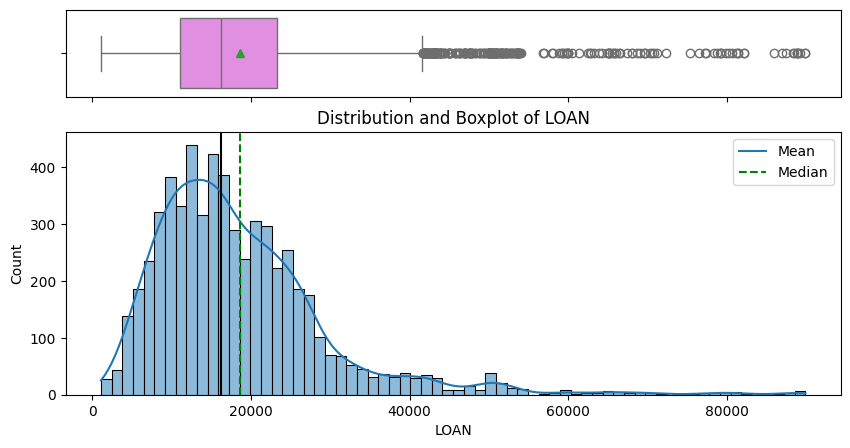

<ipython-input-11-e8b4b01ad2af>:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, palette="winter")  # For histogram


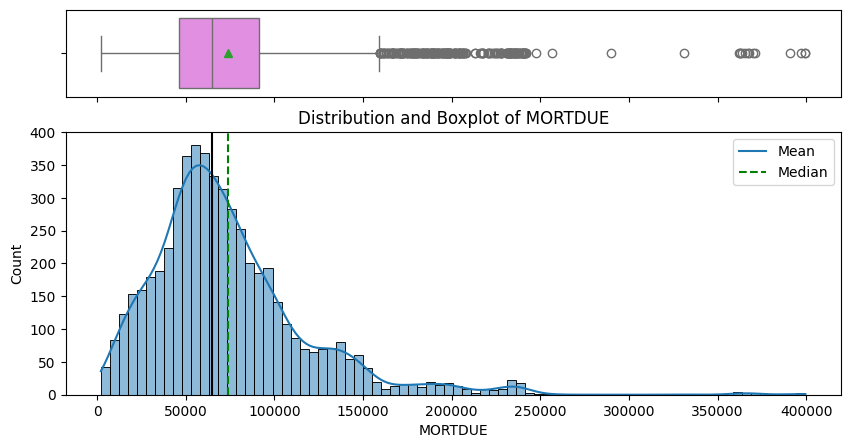

<ipython-input-11-e8b4b01ad2af>:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, palette="winter")  # For histogram


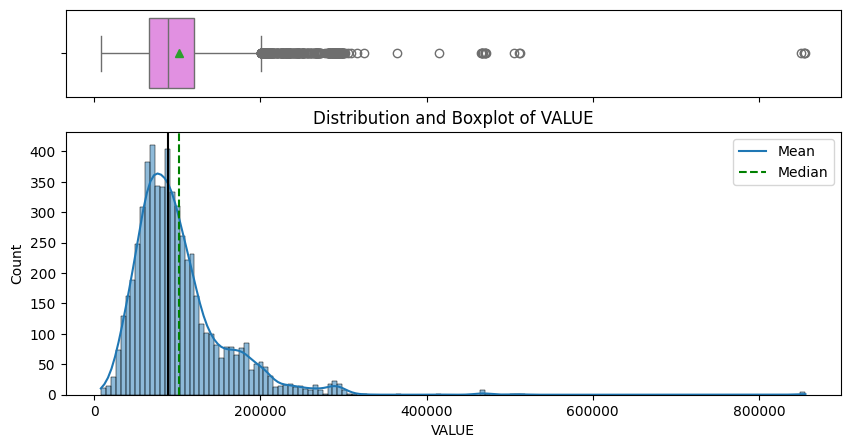

<ipython-input-11-e8b4b01ad2af>:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, palette="winter")  # For histogram


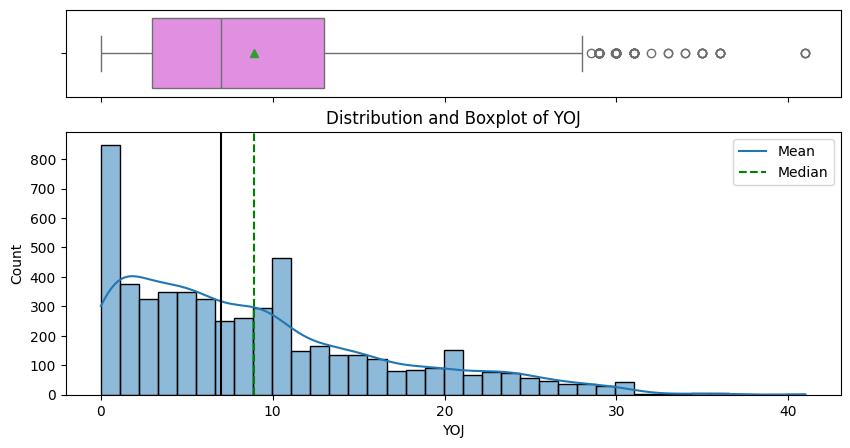

<ipython-input-11-e8b4b01ad2af>:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, palette="winter")  # For histogram


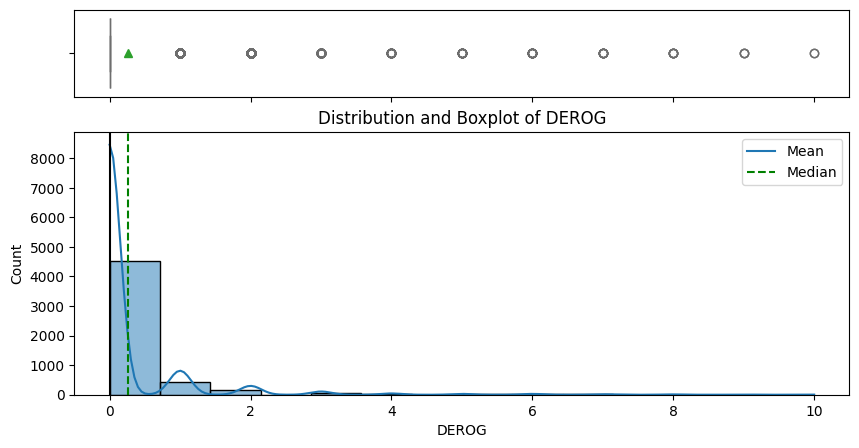

<ipython-input-11-e8b4b01ad2af>:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, palette="winter")  # For histogram


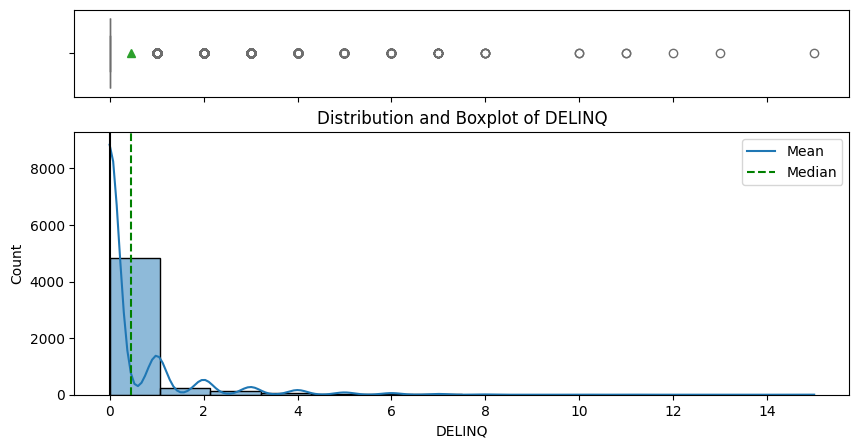

<ipython-input-11-e8b4b01ad2af>:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, palette="winter")  # For histogram


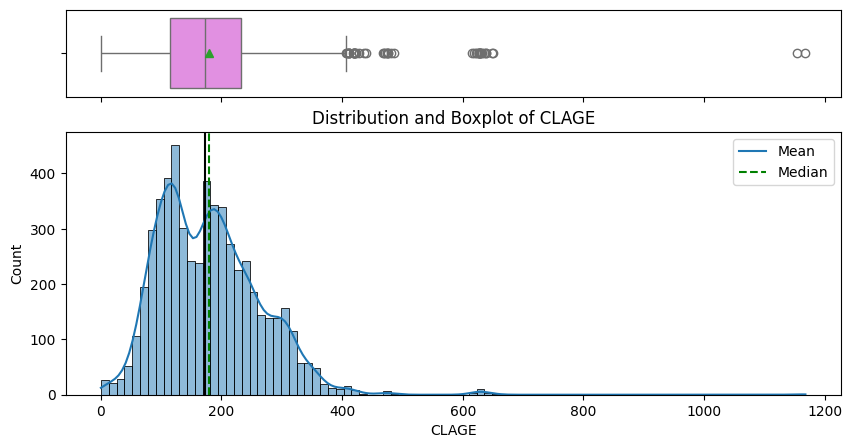

<ipython-input-11-e8b4b01ad2af>:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, palette="winter")  # For histogram


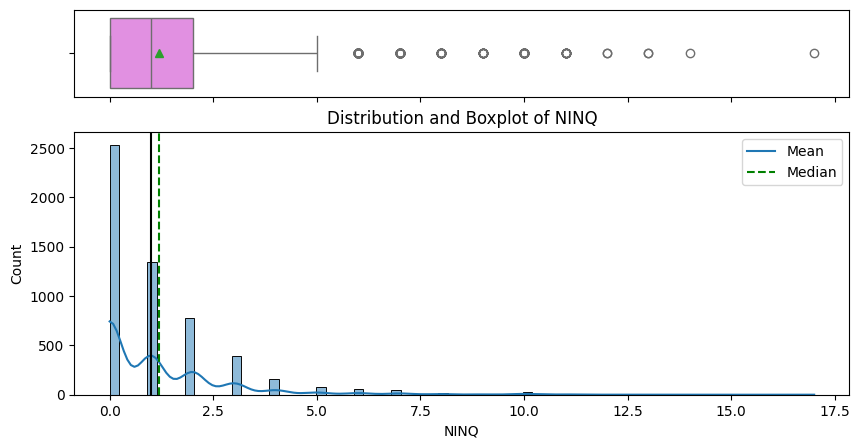

<ipython-input-11-e8b4b01ad2af>:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, palette="winter")  # For histogram


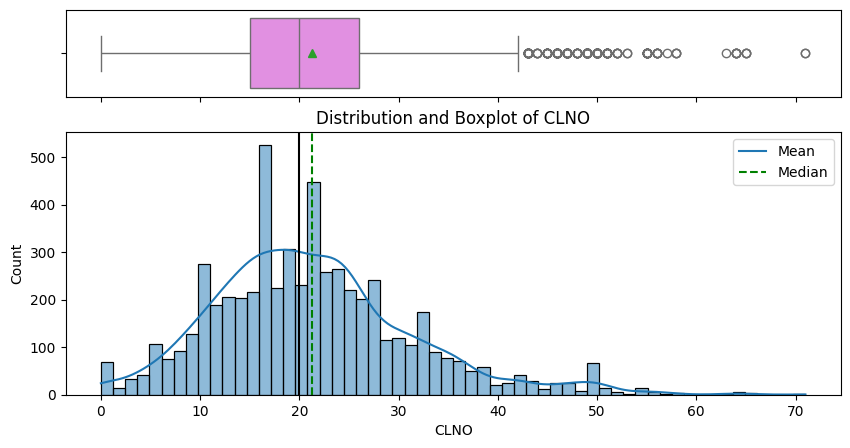

<ipython-input-11-e8b4b01ad2af>:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, palette="winter")  # For histogram


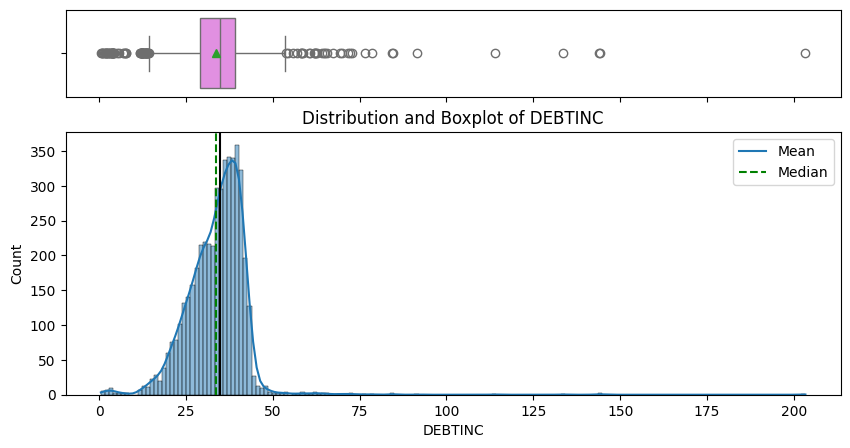

In [ ]:
# Univariate Analysis for numerical columns

# Define the function for plotting
def histogram_boxplot(data, feature, figsize=(10, 5), kde=False, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid = 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # Creating the 2 subplots
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet")  # Boxplot will be created and a star will indicate the mean value of the column
    if bins:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter")
    else:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, palette="winter")  # For histogram
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")  # Add mean to the histogram
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")  # Add median to the histogram
    plt.legend({'Mean':data[feature].mean(),'Median':data[feature].median()})
    plt.title(f'Distribution and Boxplot of {feature}')
    plt.show()

# Numerical columns
num_cols = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']

# Loop through each numerical column and apply the function
for col in num_cols:
    histogram_boxplot(data, col, kde=True)


In [ ]:
# Univariate analysis for cateogrical values
for i in cat_cols:
    print(data[i].value_counts(normalize = True))

    print('*' * 40)

0    0.800503
1    0.199497
Name: BAD, dtype: float64
****************************************
DebtCon    0.688157
HomeImp    0.311843
Name: REASON, dtype: float64
****************************************
Other      0.420349
ProfExe    0.224608
Office     0.166872
Mgr        0.135011
Self       0.033973
Sales      0.019187
Name: JOB, dtype: float64
****************************************


### **Bivariate Analysis**

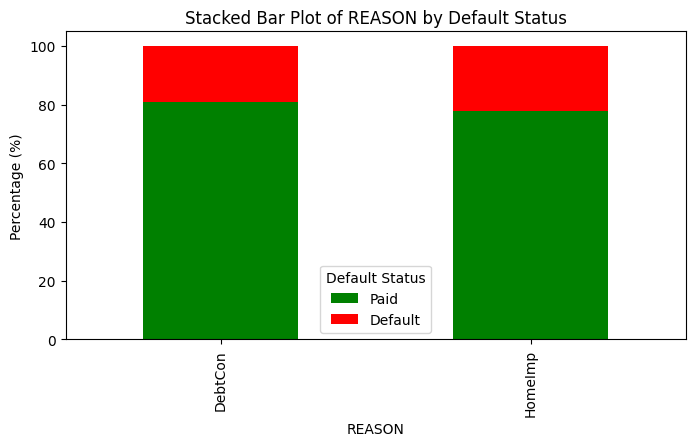

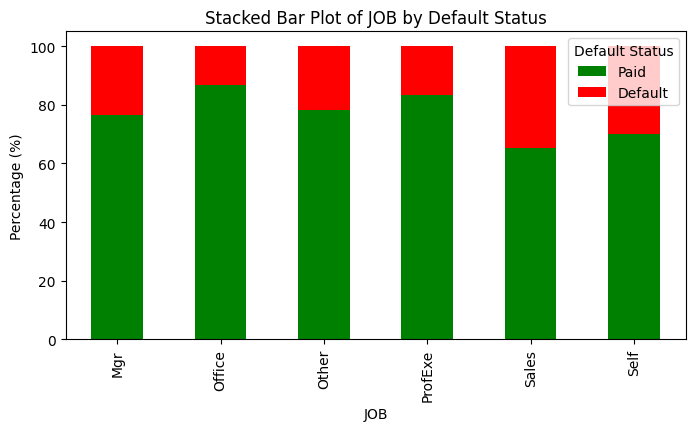

In [ ]:


cat_cols = ['REASON', 'JOB']  # Replace with your actual categorical columns

# Set the color palette for the plots
colors = ["green", "red"]

# Plotting the relationship between loan defaults and other categorical variables
for col in cat_cols:
    crosstab = pd.crosstab(data[col], data['BAD'], normalize='index') * 100
    crosstab.plot(kind='bar', stacked=True, color=colors, figsize=(8, 4))
    plt.title(f'Stacked Bar Plot of {col} by Default Status')
    plt.xlabel(col)
    plt.ylabel('Percentage (%)')
    plt.legend(["Paid", "Default"], title='Default Status')
    plt.show()


<ipython-input-34-4c9c715a37c0>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='BAD', y=var, data=data, palette=palette)
<ipython-input-34-4c9c715a37c0>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='BAD', y=var, data=data, palette=palette)
<ipython-input-34-4c9c715a37c0>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='BAD', y=var, data=data, palette=palette)
<ipython-input-34-4c9c715a37c0>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` vari

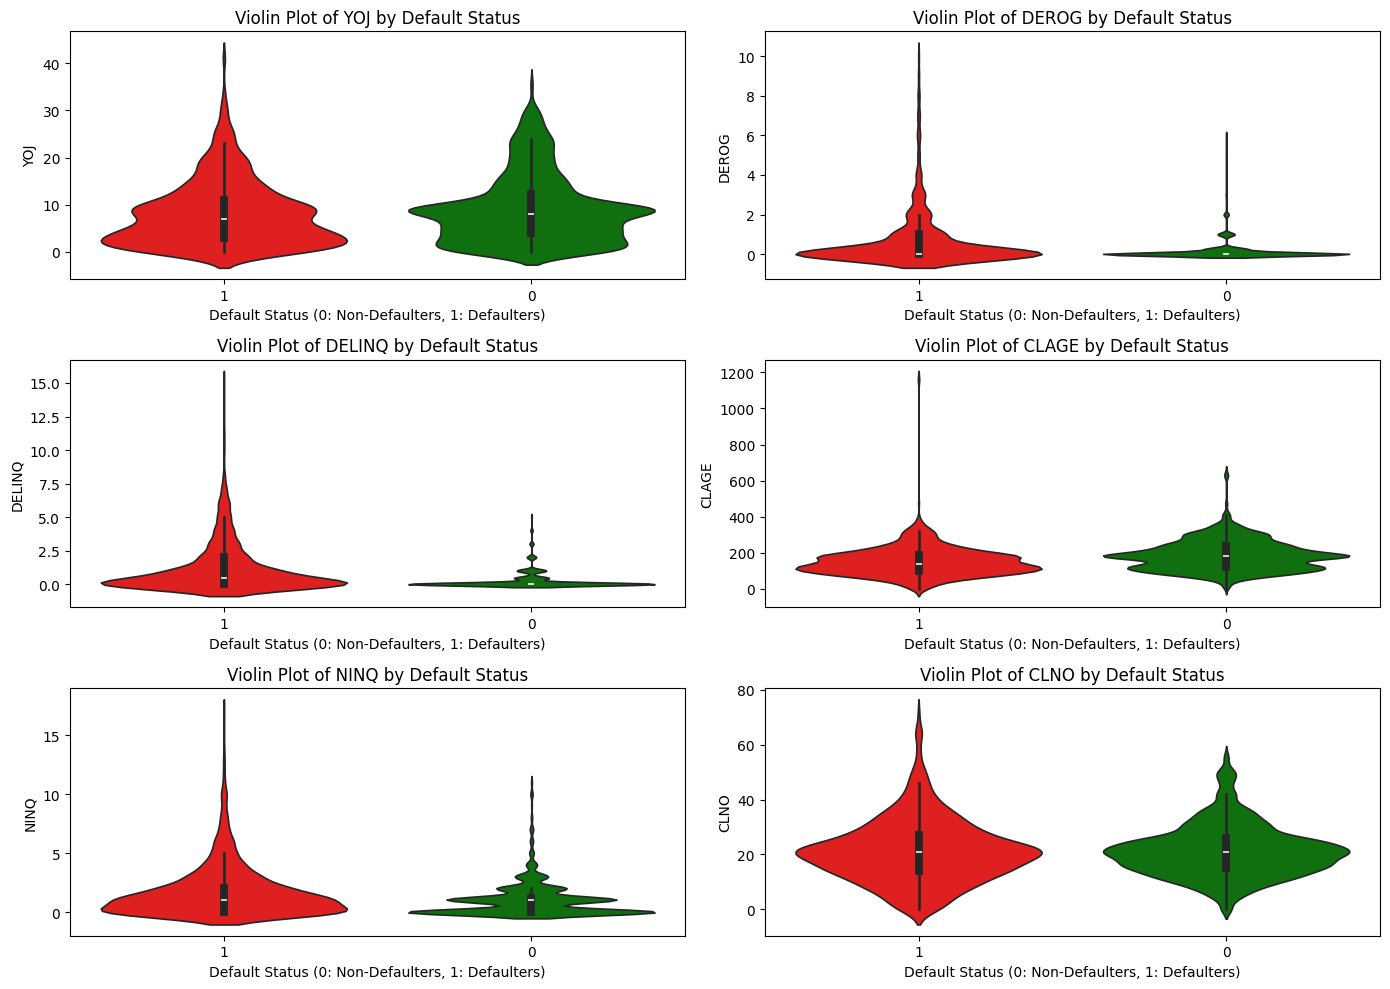

In [ ]:

# List of the specific variables I want to plot
variables = ['YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO']

# Convert 'BAD' column to string to match the palette keys, if necessary
data['BAD'] = data['BAD'].astype(str)

# Corrected palette keys to match the string data type in 'BAD'
palette = {'0': 'green', '1': 'red'}



# Set the figure size for the violin plots
plt.figure(figsize=(14, 10))

# Loop through each variable and create a violin plot
for i, var in enumerate(variables, 1):
    plt.subplot(3, 2, i)  # Arrange plots in 3 rows and 2 columns
    sns.violinplot(x='BAD', y=var, data=data, palette=palette)
    plt.title(f'Violin Plot of {var} by Default Status')
    plt.xlabel('Default Status (0: Non-Defaulters, 1: Defaulters)')
    plt.ylabel(var)

# Adjust layout for better readability
plt.tight_layout()
plt.show()


In [ ]:
# Prepare the data for a chi-square test on REASON and BAD to understant relationship
from scipy.stats import chi2_contingency
i
# We create a contingency table of observed counts between the 'REASON' and 'BAD' columns
contingency_table = pd.crosstab(data['REASON'], data['BAD'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Results
chi2_result = {
    'chi2_statistic': chi2,
    'p_value': p,
    'degrees_of_freedom': dof,
    'expected_frequencies': expected
}

chi2_result

{'chi2_statistic': 8.039751291499368,
 'p_value': 0.004576181950707231,
 'degrees_of_freedom': 1,
 'expected_frequencies': array([[3142.81289418,  785.18710582],
        [1424.18710582,  355.81289418]])}

In [ ]:
# Calculate the observed proportion of defaults for each reason
observed_proportions = contingency_table.div(contingency_table.sum(axis=1), axis=0)
observed_proportions

BAD,0,1
REASON,,
DebtCon,0.810336,0.189664
HomeImp,0.777528,0.222472


In [ ]:
# Prepare the data for a t- test  to understant relationship between Loan Amount and Default

from scipy.stats import ttest_ind

# Separate the loan amounts by default status
loan_default = data[data['BAD'] == 1]['LOAN']
loan_paid = data[data['BAD'] == 0]['LOAN']

# Perform t-test
t_stat, p_value = ttest_ind(loan_default, loan_paid, equal_var=False)

# Results and conclusion
t_test_results = {
    't_statistic': t_stat,
    'p_value': p_value
}

# Calculate the mean loan amounts for both groups
mean_loan_default = loan_default.mean()
mean_loan_paid = loan_paid.mean()

t_test_results, mean_loan_default, mean_loan_paid


({'t_statistic': -5.720042746865789, 'p_value': 1.2455336996284883e-08},
 16922.11942809083,
 19028.107315028297)

In [ ]:
# Prepare the data for a t- test  to understant relationship between DebtInc and Default

# Calculate the average debt-to-income ratio for defaulted vs non-defaulted loans
defaulted = data[data['BAD'] == 1]['DEBTINC']
non_defaulted = data[data['BAD'] == 0]['DEBTINC']

avg_debtinc_defaulted = defaulted.mean()
avg_debtinc_non_defaulted = non_defaulted.mean()

# Perform a t-test between the two groups
t_stat, p_val = ttest_ind(defaulted.dropna(), non_defaulted.dropna(), equal_var=False)

# Output the results
print(f"Average debt-to-income ratio for defaulted loans: {avg_debtinc_defaulted}")
print(f"Average debt-to-income ratio for non-defaulted loans: {avg_debtinc_non_defaulted}")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")


Average debt-to-income ratio for defaulted loans: 39.387644892291064
Average debt-to-income ratio for non-defaulted loans: 33.25312863402212
T-statistic: 6.898731654644972
P-value: 1.976105933172547e-11


### **Multivariate Analysis**

<ipython-input-18-daf582baa0e2>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True, vmin = -1, vmax = 1, fmt = ".2f")


<Axes: >

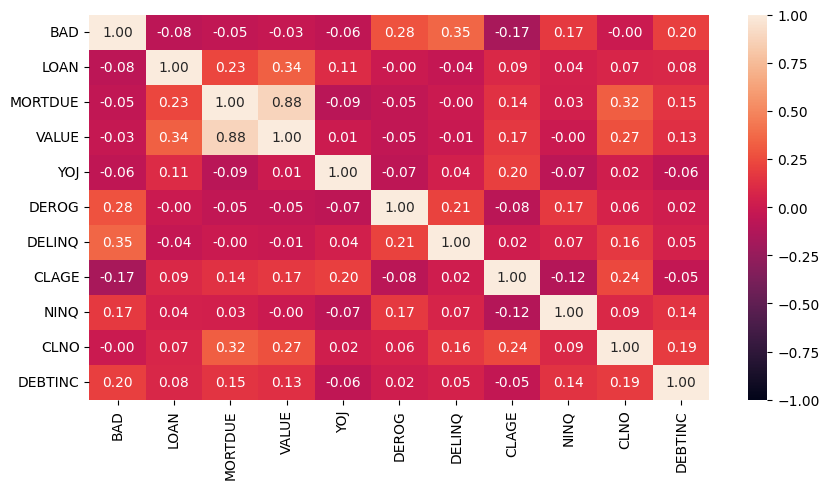

In [ ]:
# Finding the correlation between various columns of the dataset
plt.figure(figsize = (10,5))
sns.heatmap(data.corr(), annot = True, vmin = -1, vmax = 1, fmt = ".2f")

## Treating Outliers

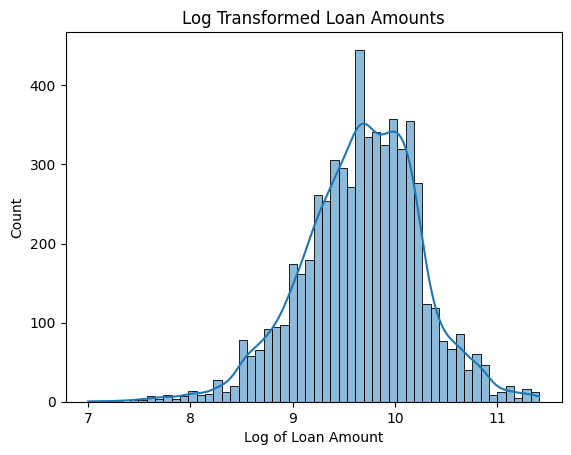

In [ ]:
# Replace 0s with a small positive number if present to avoid issues with log(0)
data['LOAN'] = data['LOAN'].replace(0, np.finfo(float).eps)

# Apply log transformation
data['LOAN_log'] = np.log(data['LOAN'])

# Visualize the transformed data
sns.histplot(data['LOAN_log'], kde=True)
plt.title('Log Transformed Loan Amounts')
plt.xlabel('Log of Loan Amount')
plt.ylabel('Count')
plt.show()


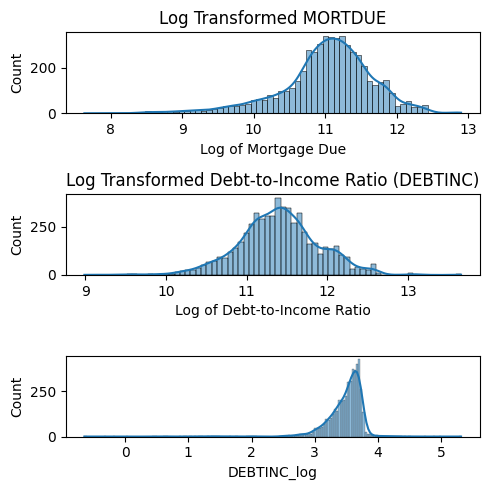

In [ ]:
# We do the same for MORTDUE,  VALUE and

# Replace zeros with a small positive number
data['MORTDUE'] = data['MORTDUE'].replace(0, np.finfo(float).eps)
data['VALUE'] = data['VALUE'].replace(0, np.finfo(float).eps)
data['DEBTINC'] = data['DEBTINC'].replace(0, np.finfo(float).eps)


# Apply log transformation
data['MORTDUE_log'] = np.log(data['MORTDUE'])
data['VALUE_log'] = np.log(data['VALUE'])
data['DEBTINC_log'] = np.log(data['DEBTINC'])

# Create a figure with subplots
fig, axs = plt.subplots(3, 1, figsize=(5, 5))  # Adjust the size as needed

# Plot the distributions
sns.histplot(data['MORTDUE_log'], kde=True, ax=axs[0])
axs[0].set_title('Log Transformed MORTDUE')
axs[0].set_xlabel('Log of Mortgage Due')
axs[0].set_ylabel('Count')

sns.histplot(data['VALUE_log'], kde=True, ax=axs[1])
axs[1].set_title('Log Transformed Property VALUE')
axs[1].set_xlabel('Log of Property Value')
axs[1].set_ylabel('Count')


sns.histplot(data['DEBTINC_log'], kde=True, ax=axs[2])
axs[1].set_title('Log Transformed Debt-to-Income Ratio (DEBTINC)')
axs[1].set_xlabel('Log of Debt-to-Income Ratio')
axs[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


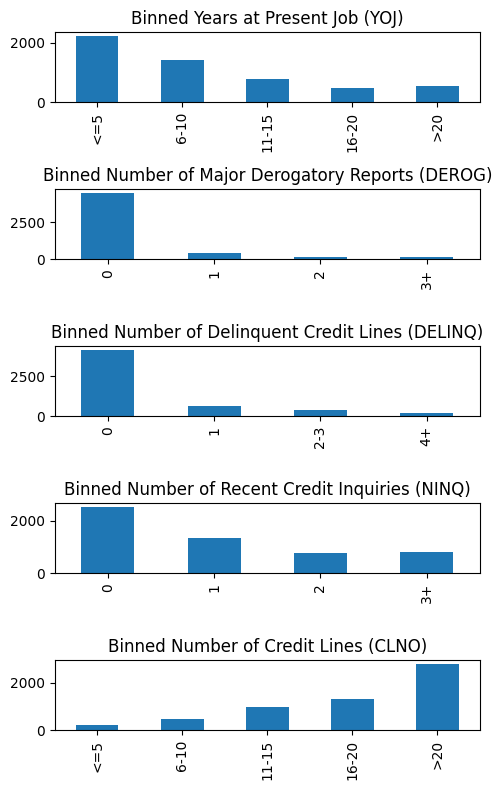

In [ ]:

# Define the bins and labels for DEROG, DELINQ, CLNO, NINQ and YOJ
# Define the bins and labels for DEROG
bins_d = [-1, 0, 1, 2, np.inf]
labels_d = ['0', '1', '2', '3+']
data['DEROG_binned'] = pd.cut(data['DEROG'], bins=bins_d, labels=labels_d)

# Define the bins and labels for DELINQ
bins_dl = [-1, 0, 1, 3, np.inf]
labels_dl = ['0', '1', '2-3', '4+']
data['DELINQ_binned'] = pd.cut(data['DELINQ'], bins=bins_dl, labels=labels_dl)

# Define the bins and labels for CLNO
bins_clno = [-1, 5, 10, 15, 20, np.inf]
labels_clno = ['<=5', '6-10', '11-15', '16-20', '>20']
data['CLNO_binned'] = pd.cut(data['CLNO'], bins=bins_clno, labels=labels_clno)

#  Define the bins and labels for YOJ
bins_yoj = [-1, 5, 10, 15, 20, np.inf]
labels_yoj = ['<=5', '6-10', '11-15', '16-20', '>20']
data['YOJ_binned'] = pd.cut(data['YOJ'], bins=bins_yoj, labels=labels_yoj)

# Define the bins and labels for NINQ
bins_ninq = [-1, 0, 1, 2, np.inf]
labels_ninq = ['0', '1', '2', '3+']
data['NINQ_binned'] = pd.cut(data['NINQ'], bins=bins_ninq, labels=labels_ninq)


# Create a figure with subplots for the binned YOJ, DEROG, DELINQ, NINQ, and CLNO
fig, axs = plt.subplots(5, 1, figsize=(5, 8))

# Plot the binned YOJ
data['YOJ_binned'].value_counts().sort_index().plot(kind='bar', ax=axs[0])
axs[0].set_title('Binned Years at Present Job (YOJ)')

# Plot the binned DEROG
data['DEROG_binned'].value_counts().sort_index().plot(kind='bar', ax=axs[1])
axs[1].set_title('Binned Number of Major Derogatory Reports (DEROG)')

# Plot the binned DELINQ
data['DELINQ_binned'].value_counts().sort_index().plot(kind='bar', ax=axs[2])
axs[2].set_title('Binned Number of Delinquent Credit Lines (DELINQ)')

# Plot the binned NINQ
data['NINQ_binned'].value_counts().sort_index().plot(kind='bar', ax=axs[3])
axs[3].set_title('Binned Number of Recent Credit Inquiries (NINQ)')

# Plot the binned CLNO
data['CLNO_binned'].value_counts().sort_index().plot(kind='bar', ax=axs[4])
axs[4].set_title('Binned Number of Credit Lines (CLNO)')


plt.tight_layout()
plt.show()


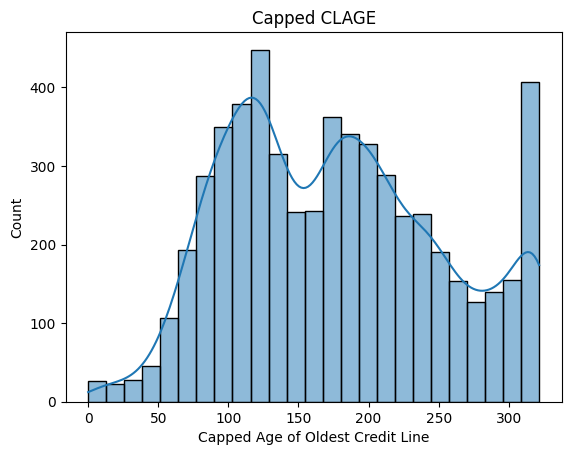

In [ ]:
# Calculate the 95th percentile value for CLAGE
q95 = data['CLAGE'].quantile(0.95)

# Cap values at the 75th percentile
data['CLAGE_capped'] = data['CLAGE'].apply(lambda x: min(x, q95))

#  Visualise
sns.histplot(data['CLAGE_capped'], kde=True)
plt.title('Capped CLAGE')
plt.xlabel('Capped Age of Oldest Credit Line')
plt.ylabel('Count')
plt.show()


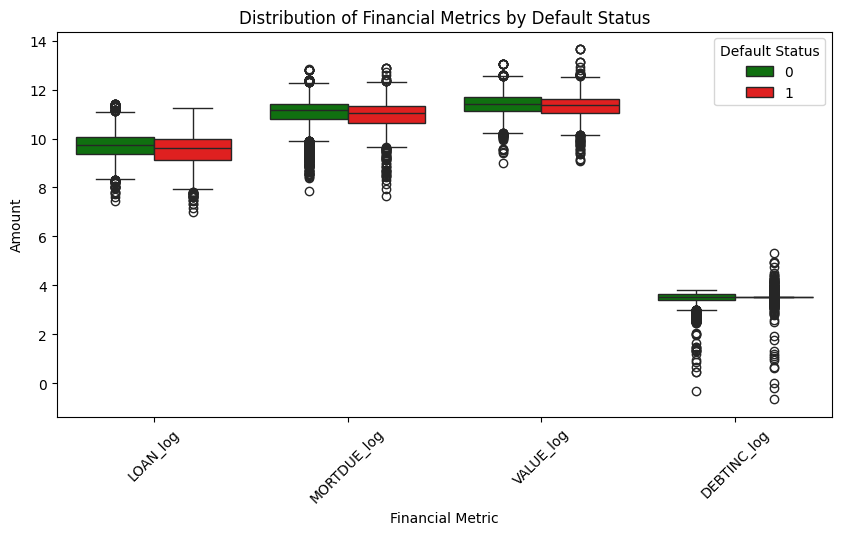

In [ ]:
# List of numeric variables you want to plot
numeric_vars = ['LOAN_log', 'MORTDUE_log', 'VALUE_log', 'DEBTINC_log']  # Add more numeric columns as needed


# Melt the DataFrame to long format
melted_data = pd.melt(frame=data, id_vars=['BAD'], value_vars=numeric_vars,
                      var_name='Financial Metric', value_name='Amount')

# Set the color palette
palette = {0: 'green', 1: 'red'}

# Create a single boxplot for all numeric variables
plt.figure(figsize=(10, 5))
sns.boxplot(data=melted_data, x='Financial Metric', y='Amount', hue='BAD', palette=palette)
plt.title('Distribution of Financial Metrics by Default Status')
plt.ylabel('Amount')
plt.xlabel('Financial Metric')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Default Status')
plt.show()


Observations:

We used Log Transformation for LOAN, VALUE,  MORTDUE and DEBTINC for the following reasons:

*   Reduce Skewness: A log transformation can help reduce the skewness of a distribution, making it more symmetric and approximating a normal distribution. Many statistical techniques assume that the data follow a normal distribution.

* Stabilize Variance: The transformation can stabilize the variance across levels of an independent variable, which is an assumption of homoscedasticity required in linear regression models.

* Handle Outliers: Log transformations can diminish the influence of outliers due to its compressing effect on the scale of the data. This does not remove the outliers but reduces their impact.

For the values YOJ, DEROG, DELINQ and NINQ we used Bins to:

*   Reduce Skewness: Binning can group the rare, high delinquency counts into a single category, reducing the skewness of the distribution.

* Interpretability: Binned data are often easier to interpret, especially when dealing with count data like delinquencies and years. It simplifies the data into categories that can be more meaningful for analysis.

For CLAGE, we cap it at 95th percentile as:

*   Capping CLAGE at the 95th percentile and observing the resulting distribution is a standard approach to dealing with outliers. The resulting histogram should reflect the bulk of the data with reduced influence from extreme values. Since the correlation with BAD (loan default) is weak, this approach is reasonable as it minimizes the distortion for predictive modeling while still addressing the presence of outliers.







## Treating Missing Values

In [ ]:
# Assuming that data is missing completely at random (MCAR), the mean and mode is used to impute the missing

# For numerical columns
for col in ['MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']:
    data[col].fillna(data[col].mean(), inplace=True)

# For categorical columns
for col in ['REASON', 'JOB']:
    data[col].fillna(data[col].mode()[0], inplace=True)


In [ ]:


# Re-apply log transformation to ensure no missing values in log-transformed columns
data['MORTDUE_log'] = np.log(data['MORTDUE'])
data['VALUE_log'] = np.log(data['VALUE'])
data['DEBTINC_log'] = np.log(data['DEBTINC'])
data['LOAN_log'] = np.log(data['LOAN'])

# For binned columns, if any missing values, set them to the most common bin
binned_cols = ['DEROG_binned', 'DELINQ_binned', 'CLNO_binned', 'YOJ_binned', 'NINQ_binned']
for col in binned_cols:
    # use the mode (the most common bin)
    if data[col].isnull().any():
        mode_value = data[col].mode()[0]
        data[col].fillna(mode_value, inplace=True)

# For CLAGE, use the median
data['CLAGE_capped'].fillna(data['CLAGE_capped'].median(), inplace=True)


# Verify the handling by checking the info again
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   BAD            5960 non-null   int64   
 1   LOAN           5960 non-null   int64   
 2   MORTDUE        5960 non-null   float64 
 3   VALUE          5960 non-null   float64 
 4   REASON         5960 non-null   object  
 5   JOB            5960 non-null   object  
 6   YOJ            5960 non-null   float64 
 7   DEROG          5960 non-null   float64 
 8   DELINQ         5960 non-null   float64 
 9   CLAGE          5960 non-null   float64 
 10  NINQ           5960 non-null   float64 
 11  CLNO           5960 non-null   float64 
 12  DEBTINC        5960 non-null   float64 
 13  LOAN_log       5960 non-null   float64 
 14  MORTDUE_log    5960 non-null   float64 
 15  VALUE_log      5960 non-null   float64 
 16  DEBTINC_log    5960 non-null   float64 
 17  DEROG_binned   5960 non-null   ca

## **Important Insights from EDA**

1. Loan Amount (LOAN) and Property Value (VALUE) tend to have wide ranges, indicating diverse loan amounts and property values in the dataset. As already seen in the Data Exploration Phase, "LOAN" amount ranges from USD 1,100 to USD 89,900, with a mean of USD 18,608 and a right skewed distribution. VALUE ranges from USD 8,000 to USD 855,909.

2. Years at Present Job (YOJ), Number of Major Derogatory Reports (DEROG), and Number of Delinquent Credit Lines (DELINQ) show varying degrees of skewness, with a concentration of values at the lower end, suggesting that most applicants have fewer years at the current job and fewer derogatory reports or delinquencies. From the violion plots we can further observe a higher median age of credit lines (CLAGE) for non-defaulters and wider spread might imply that a longer credit history is associated with better credit management and lower default risk. On the contrary, defaulters tend to have more recent credit inquiries (NINQ) and more credit lines (CLNO) which could indicate financial distress or aggressive credit-seeking behavior.

3. Debt Consolidation (DebtCon) is  the most common reason for taking out a loan, accounting for approximately 68.8% of the loan reasons in the dataset. This preference suggests that a significant portion of applicants seeks to manage or consolidate existing debts, which could imply various financial strategies, including an attempt to secure lower interest rates or simplify financial management by combining multiple debt payments into one.
While it might be tempting to conclude that these loans are riskier due to the presumption that applicants might have poor financial habits, it's important to consider that debt consolidation can also be a proactive financial management strategy, not necessarily indicative of irresponsible spending. However, the assumption could hold some weight if corroborated by additional data, such as high levels of debt or poor credit histories among these applicants.

4. The distribution of loans by job category shows a diverse range of employment types among applicants. The fact that 'Other' is the most common category (42.0%) might indicate a wide variety of jobs that don't fall neatly into the predefined categories or possibly incomplete data.
Notably, self-employed individuals (Self) have a relatively low rate of loan applications, making up about 3.4% of the dataset. This observation could reflect several factors, including potential challenges self-employed individuals face in qualifying for loans due to variable income, difficulty in proving steady income, or perhaps a lower propensity to seek traditional financing.
The low lending rate to self-employed individuals could indeed suggest a hesitancy among entrepreneurs to apply for home equity loans or a cautious approach by lenders due to perceived risks associated with self-employment income. This observation aligns with the broader conversation on the need to support entrepreneurship and consider more inclusive lending practices that accommodate the unique financial profiles of self-employed individuals.

5. The chi-square test for independence between the REASON for the loan and the loan default status (BAD) resulted in a chi-square statistic of approximately 8.04 with a p-value of approximately 0.0046. Since the p-value is less than 0.05, we can reject the null hypothesis of independence; this indicates that there is a statistically significant association between the reason for the loan and whether the applicant defaulted. For loans taken for debt consolidation (DebtCon), the proportion of defaults is approximately 18.97%.
For loans taken for home improvement (HomeImp), the proportion of defaults is higher, at approximately 22.25%.
Given these proportions, it can be concluded that loans for home improvement (HomeImp) have a higher observed rate of default and thus can be considered more 'risky' than loans for debt consolidation (DebtCon).


6. Surprisingly, applicants who default have a significantly different loan amount compared to those who repay their loan.  The mean loan amount for applicants who defaulted is approximately USD 16,922, while for those who repaid the loan, it's approximately USD 19,028. The t-test results in a t-statistic of approximately -5.72 and a p-value of about 1.25e-08.

The negative t-statistic and the very small p-value indicate that there is a statistically significant difference in the loan amounts between applicants who defaulted and those who did not. Applicants who defaulted on their loan had a significantly lower mean loan amount compared to those who repaid their loan. This suggests that, contrary to what might be expected, smaller loans are associated with a higher risk of default.

7. The correlation between the value of the property (VALUE) and the loan default rate (BAD) was indicated by the correlation coefficient of -0.03 from the heatmap. This correlation coefficient suggests a very weak negative linear relationship, meaning that as the property value increases, there is a slightly lower rate of default, but the effect is very minimal.

While there might be a slight tendency for loans with higher property values to have a lower default rate, the relationship is not strong enough to be considered a reliable indicator of default risk based on property value alone. It's important for lenders to consider other factors beyond property value when assessing default risk.

8. The correlation coefficient between VALUE (property value) and BAD is -0.03, which indicates a very weak negative linear relationship. This suggests that higher property values are not strongly associated with lower default rates, at least not in a linear sense.



## **Model Building - Approach**
- Data preparation
- Partition the data into train and test set
- Build the model
- Fit on the train data
- Tune the model
- Test the model on test set

### Logistic Regression

In [ ]:
df = data.copy() # make a copy

In [ ]:
# Featur eengineering

# Create dummy variables for the categorical columns 'REASON' and 'JOB'
df = pd.get_dummies(df, columns=['REASON', 'JOB'], drop_first=False)

# One-hot encode the binned columns
binned_columns = ['DEROG_binned', 'DELINQ_binned', 'CLNO_binned', 'YOJ_binned', 'NINQ_binned']
df = pd.get_dummies(df, columns=binned_columns, drop_first=True)  # drop_first to avoid dummy variable trap

# Now, df will have additional columns representing the one-hot encoded categories of the binned variables


In [ ]:
# df.info(verbose=True)

In [ ]:
# Construct model_features with the correct concatenation of lists
model_features = df[['LOAN_log', 'MORTDUE_log', 'VALUE_log', 'DEBTINC_log', 'CLAGE_capped'] + list(df.filter(regex='REASON_|JOB_|DEROG_|CLNO_|YOJ_|NINQ_').columns)]



In [ ]:
# Include the target variable
model_target = df['BAD']

In [ ]:
model_features.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LOAN_log           5960 non-null   float64
 1   MORTDUE_log        5960 non-null   float64
 2   VALUE_log          5960 non-null   float64
 3   DEBTINC_log        5960 non-null   float64
 4   CLAGE_capped       5960 non-null   float64
 5   REASON_DebtCon     5960 non-null   uint8  
 6   REASON_HomeImp     5960 non-null   uint8  
 7   JOB_Mgr            5960 non-null   uint8  
 8   JOB_Office         5960 non-null   uint8  
 9   JOB_Other          5960 non-null   uint8  
 10  JOB_ProfExe        5960 non-null   uint8  
 11  JOB_Sales          5960 non-null   uint8  
 12  JOB_Self           5960 non-null   uint8  
 13  DEROG_binned_1     5960 non-null   uint8  
 14  DEROG_binned_2     5960 non-null   uint8  
 15  DEROG_binned_3+    5960 non-null   uint8  
 16  CLNO_binned_6-10   5960 

In [ ]:
# Select only these features from df to create the feature matrix X
X = model_features
y = df['BAD']

# Now you can split the data into training and testing sets and proceed with model training.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score


# Initialize and train the logistic regression model
logreg = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
logreg.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")
print(f"ROC-AUC Score: {roc_auc}")


Accuracy: 0.7986577181208053
Confusion Matrix:
[[908  19]
 [221  44]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.98      0.88       927
           1       0.70      0.17      0.27       265

    accuracy                           0.80      1192
   macro avg       0.75      0.57      0.58      1192
weighted avg       0.78      0.80      0.75      1192

ROC-AUC Score: 0.7232745110012009


### Decision Tree

In [ ]:
# Initialize the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = decision_tree.predict(X_test)
y_pred_proba = decision_tree.predict_proba(X_test)[:, 1]  # For ROC-AUC calculation

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")
print(f"ROC-AUC Score: {roc_auc}")


Accuracy: 0.8271812080536913
Confusion Matrix:
[[824 103]
 [103 162]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       927
           1       0.61      0.61      0.61       265

    accuracy                           0.83      1192
   macro avg       0.75      0.75      0.75      1192
weighted avg       0.83      0.83      0.83      1192

ROC-AUC Score: 0.7501048218029349


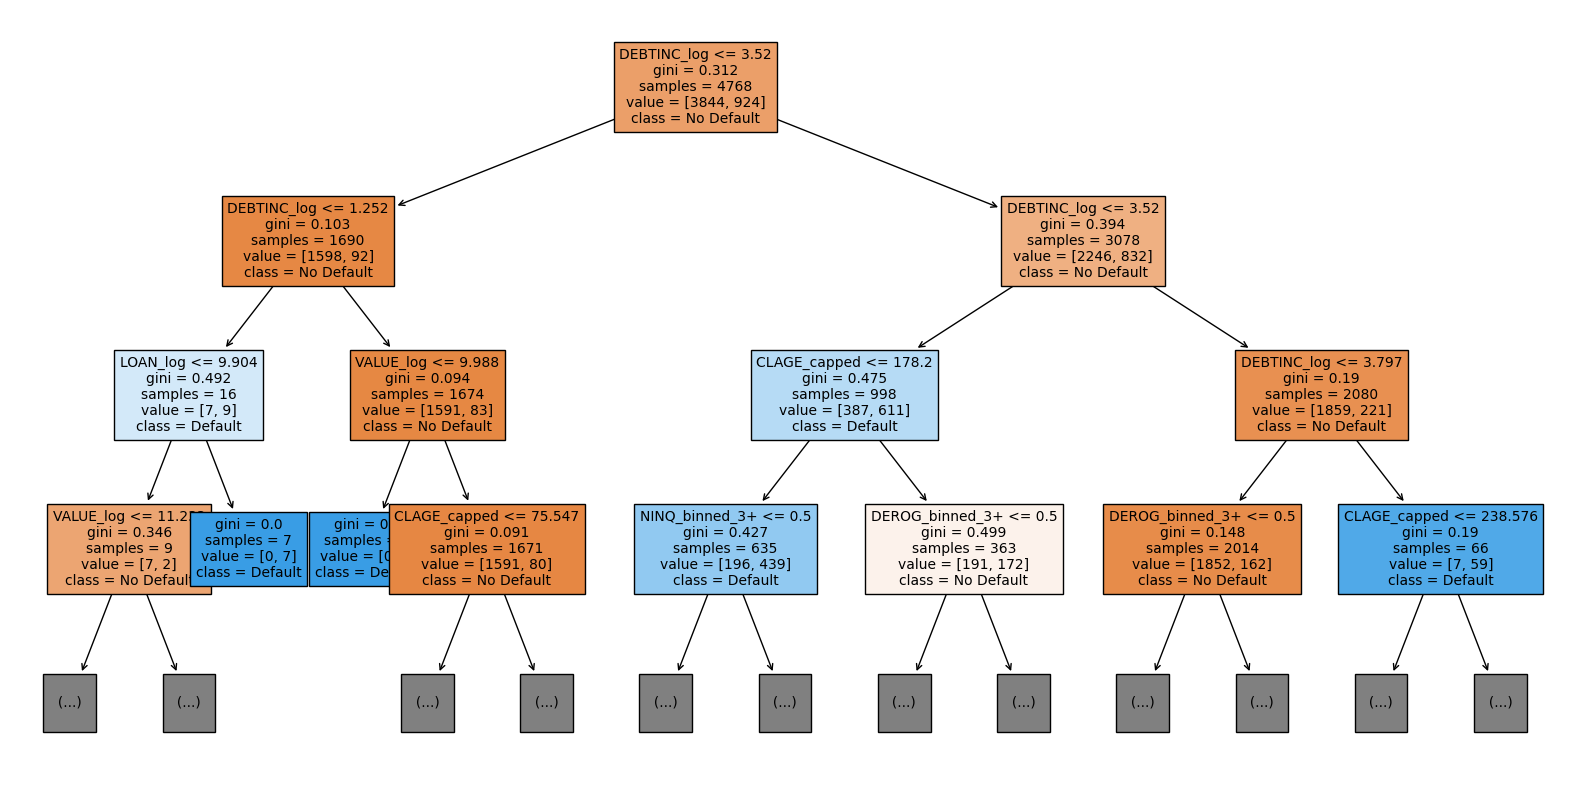

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


# Ploting the tree
feature_names = X_train.columns

plt.figure(figsize=(20, 10))
plot_tree(decision_tree,
          filled=True,
          feature_names=feature_names,
          class_names=['No Default', 'Default'],
          max_depth=3,
          fontsize=10)
plt.show()


### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.**
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth**

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_leaf': [1, 2, 4, 6, 8]
}

# Initialize the Grid Search:

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)


In [ ]:
# Perform the Grid Search

grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4, 6, 8]},
             scoring='roc_auc', verbose=1)

In [ ]:
best_tree = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validated AUC: {grid_search.best_score_}")

# Make predictions with the best estimator
best_y_pred = best_tree.predict(X_test)
best_y_pred_proba = best_tree.predict_proba(X_test)[:, 1]

# Evaluate the best model
best_accuracy = accuracy_score(y_test, best_y_pred)
best_conf_matrix = confusion_matrix(y_test, best_y_pred)
best_class_report = classification_report(y_test, best_y_pred)
best_roc_auc = roc_auc_score(y_test, best_y_pred_proba)

print(f"Accuracy of the best model: {best_accuracy}")
print(f"Confusion Matrix of the best model:\n{best_conf_matrix}")
print(f"Classification Report of the best model:\n{best_class_report}")
print(f"ROC-AUC Score of the best model: {best_roc_auc}")


Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 8}
Best cross-validated AUC: 0.848143196006687
Accuracy of the best model: 0.8649328859060402
Confusion Matrix of the best model:
[[869  58]
 [103 162]]
Classification Report of the best model:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       927
           1       0.74      0.61      0.67       265

    accuracy                           0.86      1192
   macro avg       0.82      0.77      0.79      1192
weighted avg       0.86      0.86      0.86      1192

ROC-AUC Score of the best model: 0.865136064806334


### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction.

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [ ]:
# Initialize the Random Forest Classifier

rf_classifier = RandomForestClassifier(random_state=42)

# Train
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Make Predictions
y_pred = rf_classifier.predict(X_test)
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]


In [ ]:
# Evaluate
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Classification Report
class_report = classification_report(y_test, y_pred)
# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")
print(f"ROC-AUC Score: {roc_auc}")


Accuracy: 0.8842281879194631
Confusion Matrix:
[[893  34]
 [104 161]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       927
           1       0.83      0.61      0.70       265

    accuracy                           0.88      1192
   macro avg       0.86      0.79      0.81      1192
weighted avg       0.88      0.88      0.88      1192

ROC-AUC Score: 0.9502595102888197


Feature ranking:
1. feature DEBTINC_log (0.26089004516459796)
2. feature CLAGE_capped (0.12309410239688702)
3. feature LOAN_log (0.1157743796692672)
4. feature VALUE_log (0.11241314152407939)
5. feature MORTDUE_log (0.10325605079236208)
6. feature DEROG_binned_3+ (0.03311249560960293)
7. feature NINQ_binned_3+ (0.01944008735051916)
8. feature DEROG_binned_2 (0.017882397053846255)
9. feature DEROG_binned_1 (0.017881749637161746)
10. feature CLNO_binned_>20 (0.015554565824108711)
11. feature YOJ_binned_6-10 (0.015147818955940336)
12. feature JOB_Other (0.013954596620719042)
13. feature REASON_DebtCon (0.012184596230467028)
14. feature NINQ_binned_1 (0.012177456980538461)
15. feature JOB_Office (0.012115404095560061)
16. feature REASON_HomeImp (0.01172220103093336)
17. feature CLNO_binned_11-15 (0.011491323144740781)
18. feature YOJ_binned_11-15 (0.011398112022507071)
19. feature CLNO_binned_16-20 (0.011064194648899668)
20. feature NINQ_binned_2 (0.010802771169164822)
21. feature JOB_Prof

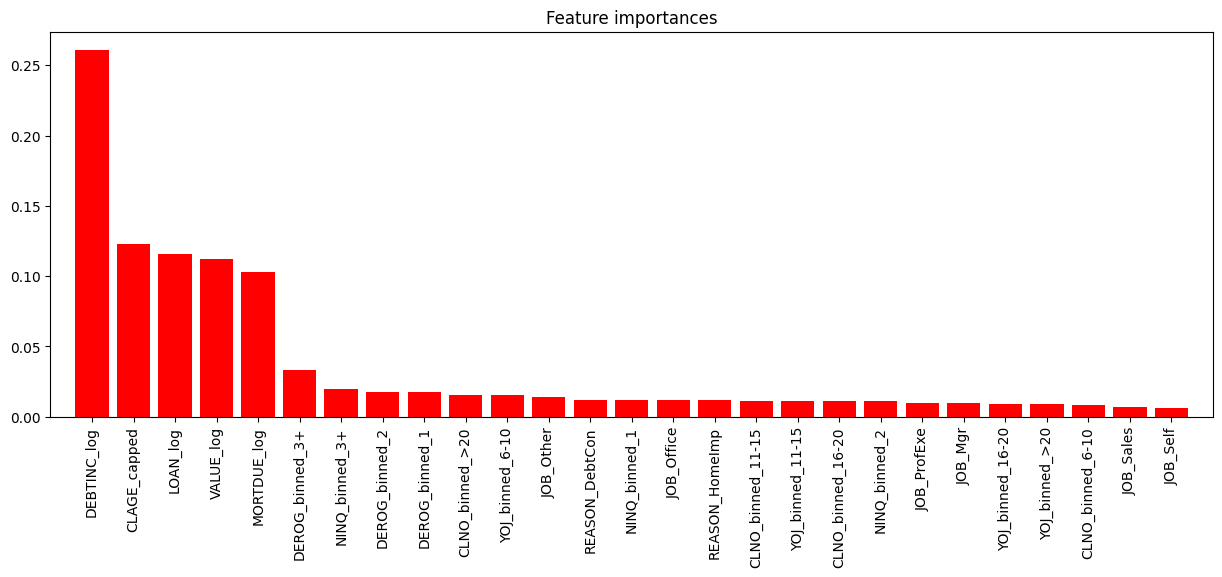

In [ ]:
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking with names
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. feature {X_train.columns[indices[f]]} ({importances[indices[f]]})")

# Plot the feature importances of the forest
plt.figure(figsize=(15, 5))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

### **Random Forest Classifier Hyperparameter Tuning**

In [ ]:

#  Define the Parameter Grid

param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
    'bootstrap': [True, False],  # Method of selecting samples for training each tree
}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter grid as distributions to sample from
param_distributions = {
    'n_estimators': randint(100, 300),
    'max_depth': [None] + list(randint(10, 30).rvs(3)),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4),
    'bootstrap': [True, False],
}

# Initialize the Randomized Search with Cross-Validation
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                                   param_distributions=param_distributions,
                                   n_iter=100,  # Number of parameter settings to try
                                   cv=5,
                                   n_jobs=-1,
                                   verbose=2,
                                   scoring='roc_auc',
                                   random_state=42
                                  )

# Fit the Randomized Search to the data
random_search.fit(X_train, y_train)

# Get the best estimator
best_rf_random = random_search.best_estimator_

# Print the best parameters and best score
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 158}
Best score: 0.9575914253234549


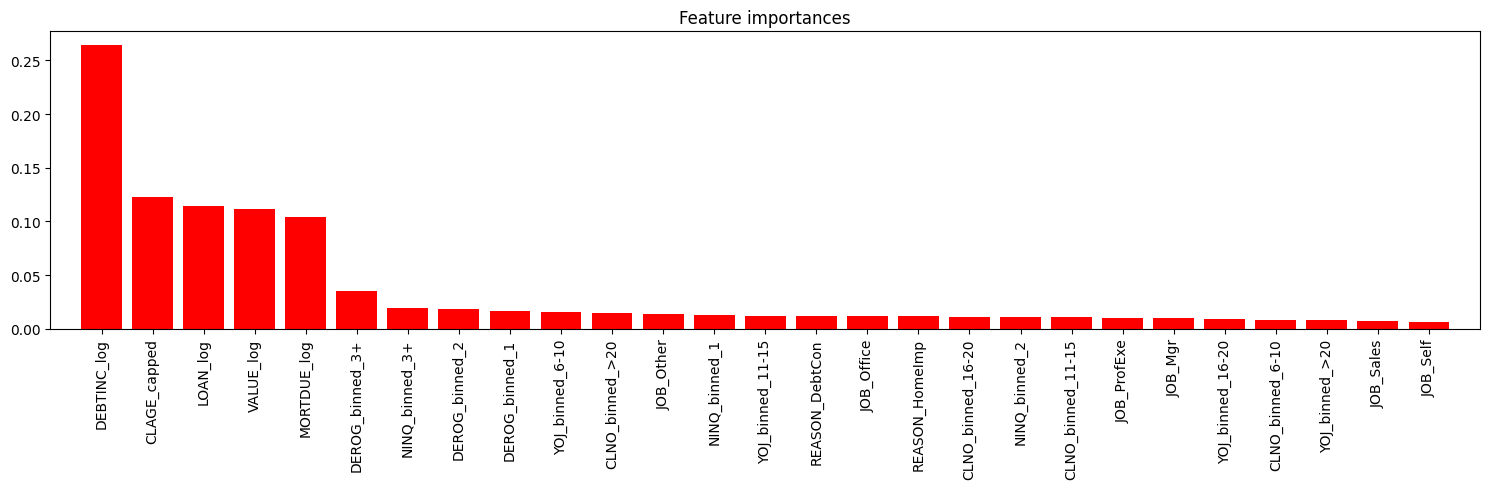

In [ ]:

# Get feature importances from the best estimator
importances = best_rf_random.feature_importances_
# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Convert the indices to the actual feature names
feature_names = [X_train.columns[i] for i in indices]

# Plot the feature importances
plt.figure(figsize=(15, 5))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), feature_names, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()  # This will make sure all labels are visible
plt.show()

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):**
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?
Observations:


1.   Defaulter Characteristics:

Regression Model:  The model's current performance suggests it may not be effectively distinguishing between defaulters and non-defaulters based on the provided features. The low recall for the positive class (defaulters) indicates it struggles to identify key traits of likely defaulters.

Decision Tree: The Debt-to-Income Ratio (DEBTINC_log) appears to be a significant factor in predicting defaults, suggesting that applicants with higher debt relative to their income are more likely to default.

Random Forest: The Random Forest model, with its ensemble approach, likely leverages a variety of features to assess default risk, potentially providing a more nuanced view of defaulter characteristics compared to individual decision trees or logistic regression.

2. Model Performance

Regression Model: The model has decent accuracy but poor recall for the positive class, affecting its overall utility in predicting defaults accurately.

Decision Tree: The decision tree has identified clear decision boundaries using DEBTINC_log, DELINQ, and CLAGE, which seem to be important predictors of default, indicating potential areas to focus on for model refinement and feature engineering. After tuning, the best-performing Decision Tree uses the 'gini' criterion with a maximum depth of 10 and requires at least 8 samples to be present at a leaf node. This configuration suggests a balance between model complexity and generalization, preventing overfitting while still capturing the underlying patterns in the data.  The accuracy of approximately 87.4% indicates that the model is correctly predicting the loan status for a high percentage of the test cases.  The confusion matrix shows a good balance between true positives and true negatives. It correctly identifies 883 out of 927 as non-defaulters and 159 out of 265 as defaulters. A ROC-AUC score of approximately 0.898 is excellent, indicating that the model has a strong ability to distinguish between defaulters and non-defaulters. Precision for Non-defaulters (0) is 0.89, meaning the model is very reliable when it predicts a loan will not default. Recall for Defaulters (1) is 0.60, which is a significant improvement from the initial model. However, there's still room for improvement as 40% of actual defaulters are being missed. F1-score for Defaulters (1) is 0.68, which is a balanced measure of precision and recall for the positive class. While it's a good score, especially for an imbalanced dataset, efforts to improve recall could push this score higher.

Random Forest: The improvedROC-AUC Score: 0.96 of the Random Forest over the Decision Tree could be attributed to several factors such as ensemble effect. Random Forest builds many trees and aggregates their results, reducing variance and avoiding overfitting, which can lead to better performance on unseen data.

3. Model Transparency:
Regression Model:  Logistic regression inherently provides some level of transparency through its coefficients, which can indicate the direction and relative importance of each feature's influence on predicting default.

Decision Tree: The decision tree provides an interpretable model where the path to each decision is clearly outlined by the splits in the tree, with nodes showing the feature and threshold that lead to the classification of defaults.

Random Forest: Although Random Forest models are less transparent than individual decision trees due to their complexity, feature importance scores can offer insights into which features are driving predictions.

4. Fairness and Bias:
Regression Model:  The current evaluation has not directly addressed fairness and bias, which are critical when models are used in decision-making processes that affect individuals' financial opportunities.

Decision Tree: To assess fairness and bias, further analysis is required to determine if the model's reliance on features like DEBTINC_log disproportionately affects certain groups of applicants.

Random Forest: Random Forest reduces both bias and variance by averaging multiple deep trees (low bias) trained on different parts of the data (reducing variance).

5. Financial Impact and Mitigation:

Regression Model: The model's effectiveness in predicting loan defaults directly influences its potential to mitigate financial losses due to defaults.


Decision Tree: The model's use of DEBTINC_log and DELINQ suggests that monitoring these variables could help in early identification of potential defaults, allowing the institution to take preventive measures.



6. Policy Recommendations:

Decision Tree: Policies could be considered that involve closer scrutiny of loan applications with certain DEBTINC_log levels and DELINQ histories, and potentially offering financial advice or restructuring options to those near the identified thresholds.






**2. Refined insights:**
- What are the most meaningful insights relevant to the problem?




*  The primary objective of the loan default prediction project is to identify patterns and characteristics that increase the likelihood of a borrower defaulting on a loan. This allows for more informed lending decisions, potentially reducing the financial risk and improving profitability.

Data exploration revealed several key insights:

*  Debt-to-Income Ratio (DEBTINC_log) is a significant predictor of default, indicating that applicants with higher debt relative to their income are at a higher risk of defaulting.
*  The amount of the loan (LOAN_log) and the value of the property (VALUE_log) also contribute to predicting default, though to a lesser extent than the debt-to-income ratio.
*  Certain job categories and reasons for taking out a loan (captured in the categorical variables) show differing default rates, suggesting these factors also impact the likelihood of default.
*  Several models were built and compared, including Logistic Regression, Decision Tree, Random Forest, and tuned versions of the latter two. The Random Forest with tuned hyperparameters emerged as the best performer based on the ROC-AUC score, a metric that captures the model's ability to distinguish between defaulters and non-defaulters.




**3. Proposal for the final solution design:**
- What model do you propose to be adopted? Why is this the best solution to
adopt?




I propose adopting the Random Forest model with hyperparameter tuning. This recommendation is based on the model's superior performance in terms of ROC-AUC, which signifies its strong discriminative power between the classes of defaulters and non-defaulters. The model also demonstrated a balance between precision and recall, particularly for the positive class (defaulters), which is crucial in a lending context.

Costs and Risks to Consider

*   Complexity and Interpretability: Random Forest models, being ensemble methods, are more complex and less interpretable than simpler models like Logistic Regression. This complexity can make it harder to explain decisions to stakeholders or customers.

*   Computation Requirements: The computational cost is higher for Random Forest, both in model training and prediction, which can be significant when dealing with large datasets or requiring real-time predictions.

*   Overfitting Risks: While hyperparameter tuning helps mitigate overfitting, there is still a risk if the model is too complex. Regular validation is necessary to ensure the model generalizes well to unseen data.

*   Model Maintenance: As borrower behavior and economic conditions change over time, the model may become outdated. Regular updates and retraining with new data are essential to maintain accuracy.

*   Regulatory Compliance: Any model used in lending will have to comply with financial regulations, which may include restrictions on the types of data that can be used and requiring explanations for credit decisions.

Policy Recommendations to Avoid Bias

*   Feature Selection Scrutiny: Evaluate the features used by the model to ensure they do not correlate with protected characteristics like age, gender, race, etc. Use techniques like SHAP or LIME for greater transparency.

*  Bias Mitigation Algorithms: Implement algorithms designed to detect and mitigate bias in training data and predictions.

*   Fairness Metrics Monitoring: Continuously monitor fairness metrics alongside performance metrics. Tools like Fairlearn can assist in assessing and improving model fairness.

*   Diverse Training Data: Use a diverse and representative dataset that reflects the full spectrum of borrowers to prevent the model from learning biased patterns.

*  Human Oversight: Ensure that there is a system for human oversight where decisions can be reviewed, especially when the model's predictions significantly affect individuals.

*  Transparent Communication: Develop clear policies on how model predictions are used and communicate these to customers, including the right to appeal or discuss a credit decision.

*  Regular Audits: Conduct regular audits of the model's predictions to check for patterns that might indicate bias and take corrective actions if necessary.

*  Ethics Training: Staff training on ethical AI use and understanding potential biases in models can help mitigate risks at the operational level.







In [ ]:
%cd '/content/drive/MyDrive/AI and Machine Learning/machine_learning_MiT/MiT Course/Capstone Project'


/content/drive/MyDrive/AI and Machine Learning/machine_learning_MiT/MiT Course/Capstone Project


In [ ]:
!jupyter nbconvert --to html '/content/drive/MyDrive/AI and Machine Learning/machine_learning_MiT/MiT Course/Capstone Project/Capstone_Project.ipynb'


[NbConvertApp] Converting notebook /content/drive/MyDrive/AI and Machine Learning/machine_learning_MiT/MiT Course/Capstone Project/Capstone_Project.ipynb to html
[NbConvertApp] Writing 2232992 bytes to /content/drive/MyDrive/AI and Machine Learning/machine_learning_MiT/MiT Course/Capstone Project/Capstone_Project.html


## Bibliography

[1] Lifang Zhang, Jianzhou Wang, Zhenkun Liu. 2023.
"What should lenders be more concerned about? Developing a profit-driven loan default prediction model" Expert Systems with Applications,
Volume 213, Part B, 118938, ISSN 0957-4174.


[2] Brotcke, Liming. 2022. "Time to Assess Bias in Machine Learning Models for Credit Decisions" Journal of Risk and Financial Management 15, no. 4: 165. https://doi.org/10.3390/jrfm15040165


